# 描画に必要なモジュール類をインポート

In [2]:
%matplotlib notebook

import ipywidgets as widgets

import matplotlib.pyplot as plt
import numpy as np

import pathlib
from PIL import Image

# import matplotlib as mpl
# from IPython.display import display


# 2目的の問題の個体群可視化

<IPython.core.display.Javascript object>


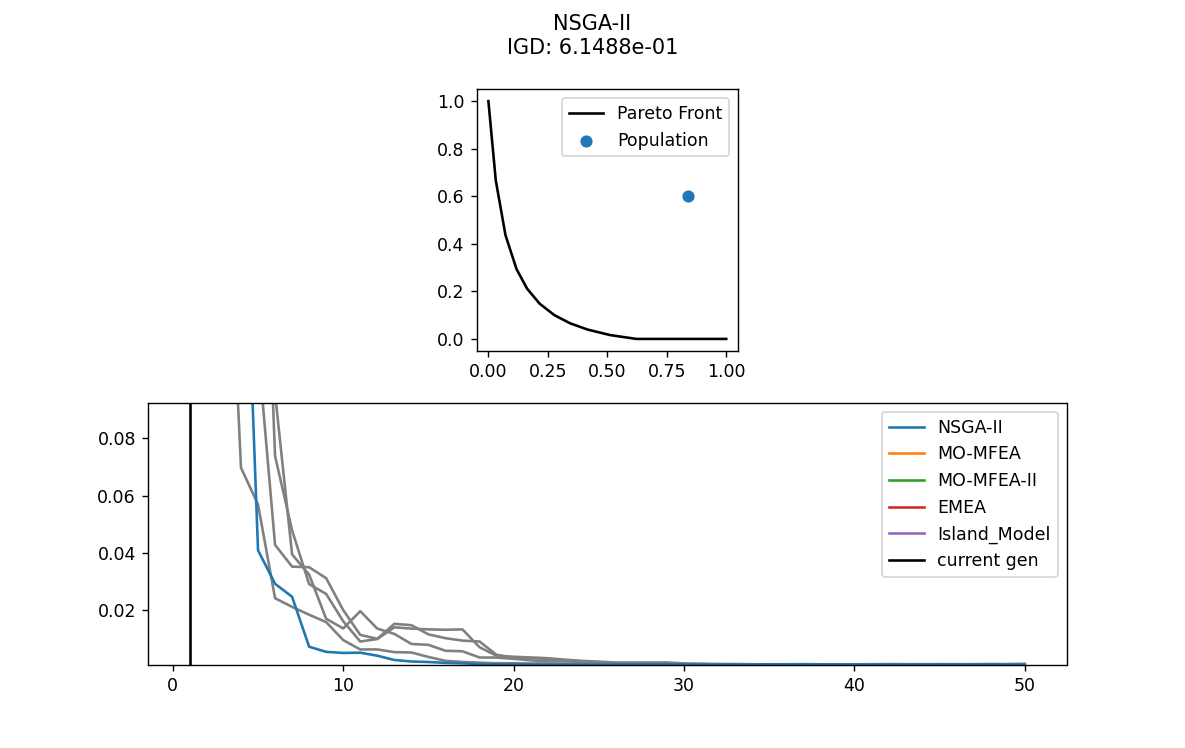

interactive(children=(IntSlider(value=25, description='gen', max=50, min=1), Dropdown(description='問題名', optio…

In [4]:
alg_names = [n.split("/")[0] for n in["NSGA-II/1017", "MO-MFEA/1019", "MO-MFEA-II/1019", "EMEA/1017", "Island_Model/1017"]]
original_names = ["Four bar truss design", "Reinforced concrete beam design", "Pressure vessel design","Hatch cover design","Coil compression spring design"]

class image_viewer:
    
    def __init__(self):
        
        self.pf = {}
        self.objs = {}
        self.metrics = {}
        
        self.color_palette = {}
        
        self.previous = None
        
        problem_names = ["RE21", "RE22", "RE23", "RE24","RE25"]
        
        names = ["NSGA-II/1017", "MO-MFEA/1019", "MO-MFEA-II/1019", "EMEA/1017", "Island_Model/1017"]
        
        for alg_name, c in zip(names, ['tab:blue','tab:orange','tab:green','tab:red','tab:purple']):
            
            n = alg_name.split("/")[0]
            self.objs[n] = {}
            self.metrics[n] = {}
            self.color_palette[n] = c
            
            p = pathlib.Path(alg_name)
            dirs = p.glob("*design/")
            
            for d in dirs:
                
                key = str(d.name).split("_")[-1]
                self.objs[n][key] = np.load(f'{alg_name}/{d.name}/trial1_objectives.npz')["arr_0"][:50]
                self.metrics[n][key] = np.loadtxt(f'{alg_name}/{d.name}/normalized_IGD_log_trial1.csv', delimiter = ",")[:50]
                
#         max_IGD = np.array([[np.max(prob_value) for prob_value in alg_value.values()] for alg_value in self.metrics.values()]).max(axis = 0)
        
#         for alg_key in self.metrics.keys():
#             for prob_key, max_value in zip(self.metrics[alg_key].keys(), max_IGD):
#                 self.metrics[alg_key][prob_key] /= max_value

        original_names = ["Four bar truss design", "Reinforced concrete beam design", "Pressure vessel design","Hatch cover design","Coil compression spring design","Two bar truss design", "Welded beam design","Disc brake design","Vehicle crashworthiness design","Speed reducer design","Gear train design","Rocket injector design","Car side impact design","Conceptual marine design"]

        for name, original_name in zip(problem_names, original_names):
        
            pf = np.loadtxt(f'real_world_problem/approximated_Pareto_fronts/{name}.csv', delimiter = ",")

            ideal = pf.min(axis = 0)
            nadir = pf.max(axis = 0)

            self.pf[original_name] = ((pf[pf[:, 0].argsort()] - ideal) / (nadir - ideal)).T
            
            for alg_name in alg_names:
                self.objs[alg_name.split("/")[0]][original_name] = (self.objs[alg_name.split("/")[0]][original_name] - ideal) / (nadir - ideal)
        
    def first_draw(self, p_name = "Coli compression design", alg_name = "MO-MFEA"):
        
#         setting
        self.fig, self.axes = plt.subplots(2, 1)
        self.ax, self.sub_ax = self.axes
        
#         population plot
        self.line, = self.ax.plot(self.pf[p_name][0], self.pf[p_name][1], c = "k", label = "Pareto Front")
        self.ax.set_aspect('equal')
        
        self.txt = self.fig.suptitle(f'IGD: {self.metrics[alg_name][p_name][0]:.4e}')
        self.scat = self.ax.scatter([], [], label = "Population")
                
        self.ax.legend()   
        
#         IGD plot
        self.IGD_lines = self.sub_ax.plot(range(1, 51), np.array([m[p_name] for m in self.metrics.values()]).T, label = alg_names)
        self.current_gen = plt.axvline(0, c = "k", label = "current gen")
     
        self.sub_ax.legend()

    def view_image(self, gen, p_name = "Coil compression design", alg_name = "MO-MFEA"):
        
#         if self.previous != p_name:
#             self.first_draw(p_name, alg_name)
#             self.previous = p_name

#         self.first_draw(p_name, alg_name)
            
        self.txt.set_text(f'{alg_name.replace("_", " ")}\nIGD: {self.metrics[alg_name][p_name][gen - 1]:.4e}')
        self.line.set_data(self.pf[p_name][0], self.pf[p_name][1])
        self.scat.set_offsets(self.objs[alg_name][p_name][gen - 1])
        
        for l, key in zip(self.IGD_lines, self.objs.keys()):
            
            if key == alg_name:
                color = self.color_palette[alg_name]
                l.set_data(range(1, 51), self.metrics[key][p_name])
                l.zorder = 1
            else:
                color = "gray"
                l.set_data(range(1, 51), self.metrics[key][p_name])
                l.zorder = -1
                
            l.set_color(color)
            
#         self.IGD_lines.set_data(range(1, 51), self.metrics[alg_name][p_name])
#         self.IGD_lines.set_color(self.color_palette[alg_name])
#         self.current_point.sef_offsets(gen, self.metrics[alg_name][p_name][gen - 1])
        self.current_gen.set_xdata(gen)

viewer = image_viewer()

problem = widgets.Dropdown(description = "問題名", options = original_names)
alg1 = widgets.ToggleButtons(description = "アルゴリズム名", options = alg_names)

viewer.first_draw(problem.value, alg1.value)
widgets.interact(viewer.view_image, gen = (1, 50, 1), p_name = problem, alg_name = alg1);


<IPython.core.display.Javascript object>


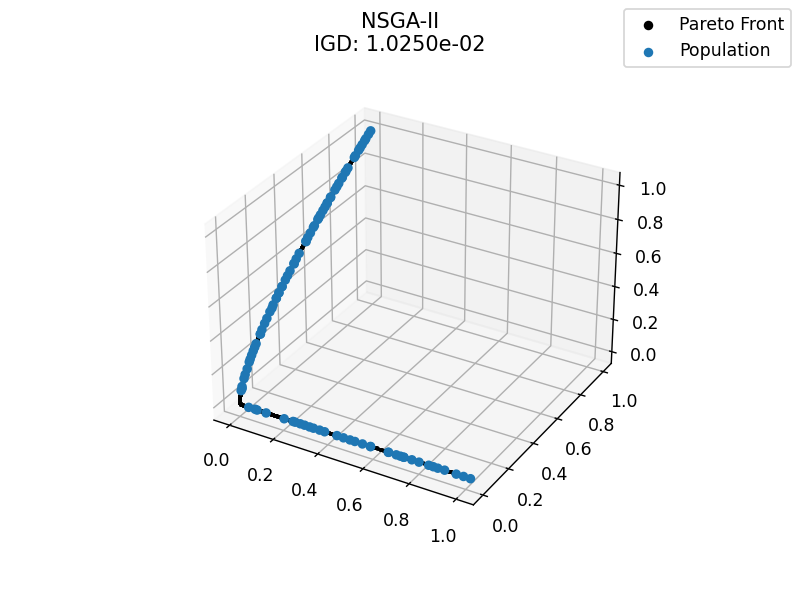

interactive(children=(IntSlider(value=25, description='gen', max=50, min=1), Dropdown(description='問題名', optio…

In [9]:
alg_names = [n.split("/")[0] for n in["NSGA-II/1017", "MO-MFEA/1019", "MO-MFEA-II/1019", "EMEA/1017", "Island_Model/1017"]]
original_names = ["Two bar truss design", "Welded beam design","Disc brake design","Vehicle crashworthiness design","Speed reducer design","Gear train design","Rocket injector design","Car side impact design","Conceptual marine design"]

class image_viewer:
    
    def __init__(self):
        
        self.pf = {}
        self.objs = {}
        self.metrics = {}
        
        self.previous = None
        
        problem_names = ["RE31","RE32", "RE33", "RE34", "RE35", "RE36", "RE37"]
        
        alg_names = ["NSGA-II/1017", "MO-MFEA/1019", "MO-MFEA-II/1019", "EMEA/1017", "Island_Model/1017"]
        
        for alg_name in alg_names:
            
            n = alg_name.split("/")[0]
            self.objs[n] = {}
            self.metrics[n] = {}
            
            p = pathlib.Path(alg_name)
            dirs = p.glob("*design/")
            
            for d in dirs:
                
                key = str(d.name).split("_")[-1]
                self.objs[n][key] = np.load(f'{alg_name}/{d.name}/trial1_objectives.npz')["arr_0"]
                self.metrics[n][key] = np.loadtxt(f'{alg_name}/{d.name}/normalized_IGD_log_trial1.csv', delimiter = ",")

        original_names = ["Two bar truss design", "Welded beam design","Disc brake design","Vehicle crashworthiness design","Speed reducer design","Gear train design","Rocket injector design","Car side impact design","Conceptual marine design"]

        for name, original_name in zip(problem_names, original_names):
        
            pf = np.loadtxt(f'../implementation/problems/real_world_problem/approximated_Pareto_fronts/{name}.csv', delimiter = ",")

            ideal = pf.min(axis = 0)
            nadir = pf.max(axis = 0)

            self.pf[original_name] = ((pf[pf[:, 0].argsort()] - ideal) / (nadir - ideal)).T
            
            for alg_name in alg_names:
                self.objs[alg_name.split("/")[0]][original_name] = (self.objs[alg_name.split("/")[0]][original_name] - ideal) / (nadir - ideal)
        
    def first_draw(self, p_name = "Welded beam design", alg_name = "MO-MFEA"):
        
        self.fig = plt.figure()
        self.ax = self.fig.add_subplot(111, projection = '3d')
        self.line = self.ax.scatter(*self.pf[p_name], color = "k", alpha = 1, label = "Pareto Front")
        
#         self.ax.set_aspect('equal')
        
        self.txt = self.fig.suptitle(f'IGD: {self.metrics[alg_name][p_name][0]:.4e}')
        self.scat = self.ax.scatter([], [], [], label = "Population")
        
        self.fig.legend()

    def view_image(self, gen, p_name = "Welded beam design", alg_name = "MO-MFEA"):
        
#         if self.previous != p_name:
#             self.first_draw(p_name, alg_name)
#             self.previous = p_name

#         self.first_draw(p_name, alg_name)

        self.line.remove()
        self.scat.remove()
        
        mask = ((self.objs[alg_name][p_name][gen - 1] < -0.05) | (self.objs[alg_name][p_name][gen - 1] > 1.05)).max(axis = 1)
            
        self.txt.set_text(f'{alg_name.replace("_", " ")}\nIGD: {self.metrics[alg_name][p_name][gen - 1]:.4e}')
        self.line = self.ax.scatter(*self.pf[p_name], color = "k", alpha = 1, s = 1, marker = "s")
        self.scat = self.ax.scatter(*self.objs[alg_name][p_name][gen - 1][~mask].T, color = "tab:blue", alpha = 1)
        
        self.ax.set(xlim = [-0.05, 1.05], ylim = [-0.05, 1.05], zlim = [-0.05, 1.05])

viewer = image_viewer()

problem = widgets.Dropdown(description = "問題名", options = original_names)
alg1 = widgets.ToggleButtons(description = "アルゴリズム名", options = alg_names)

viewer.first_draw(problem.value, alg1.value)
widgets.interact(viewer.view_image, gen = (1, 50, 1), p_name = problem, alg_name = alg1);
